In [2]:
import numpy as np

In [3]:
import pandas as pd

In [29]:
import keras

Using TensorFlow backend.


In [30]:
from sklearn import metrics
from IPython.display import display, HTML 
import tensorflow as tf

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [12]:
import os

os.getcwd()

'C:\\Users\\nilsi\\Desktop\\git\\[9] Autoencoder for my photos'

In [17]:
os.chdir(os.getcwd().replace("\\[9] Autoencoder for my photos",""))

In [18]:
os.getcwd()

'C:\\Users\\nilsi\\Desktop\\git'

In [20]:
os.listdir()

['.ipynb_checkpoints',
 'Dataset_Dacon',
 'IMG_7074.JPG',
 '[0] Laptop_project',
 '[1] 상권분석 프로젝트',
 '[2] 네이버 영화 리뷰 크롤러',
 '[3] 코딩테스트',
 '[4] fire_prediction',
 '[5] 파이썬 자료구조 알고리즘',
 '[6] 코드 모음',
 '[7] Google Q&A',
 '[8] Dacon_semiconductor',
 '[9] Autoencoder for my photos']

In [21]:
photo = Image.open("IMG_7074.JPG")

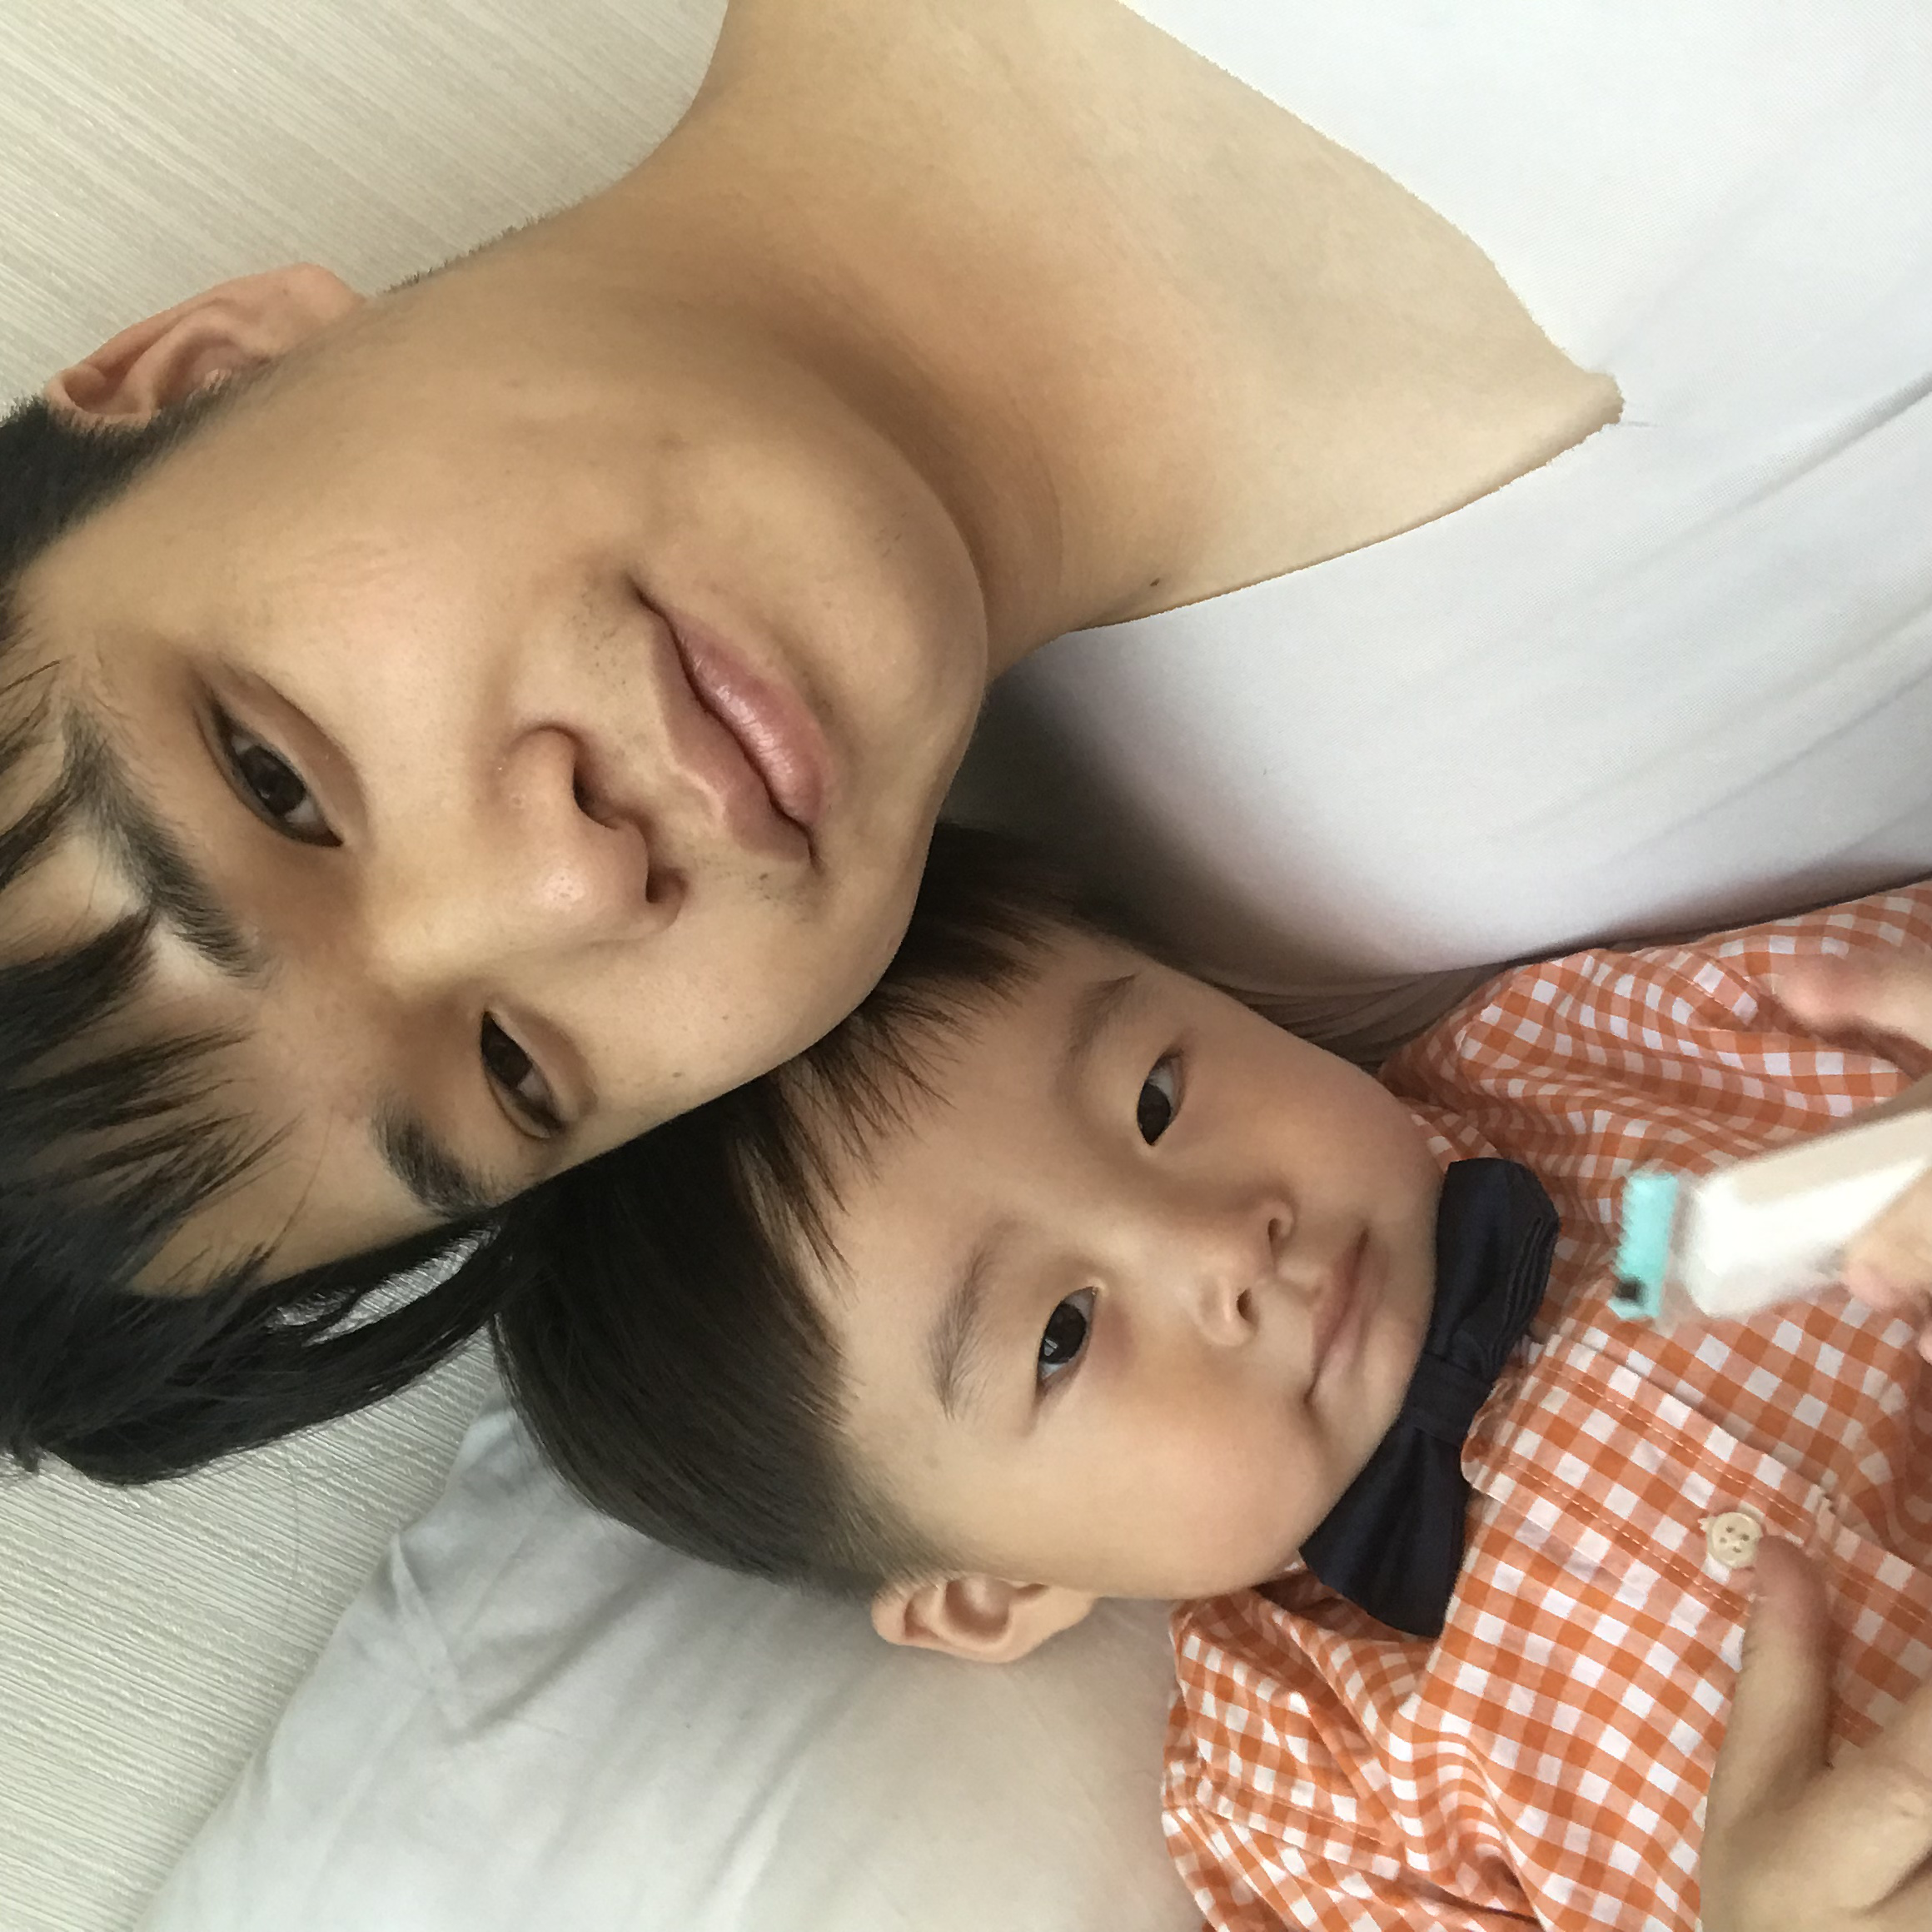

In [24]:
photo

In [23]:
type(BytesIO(response.content))

_io.BytesIO

In [1]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
from tensorflow.keras.optimizers import SGD
import requests
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"
    
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [5]:
img.load()

In [10]:
Image.ANTIALIAS

1

In [6]:
img = img.resize((128,128), Image.ANTIALIAS)

In [38]:
photo = photo.resize((128,128))

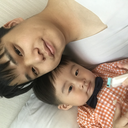

In [39]:
photo

In [40]:
img_array = np.asarray(photo)
img_array = img_array.flatten()
img_array = np.array([ img_array ])
img_array = img_array.astype(np.float32)
print(img_array.shape[1])
print(img_array)

49152
[[223. 223. 198. ... 192. 163. 129.]]


In [41]:
model = Sequential()
model.add(Dense(20, input_dim=img_array.shape[1], activation='relu'))
model.add(Dense(img_array.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(img_array,img_array,verbose=0,epochs=500)

In [42]:
print("Neural network output")
pred = model.predict(img_array)
print(pred)
print(img_array)
cols,rows = img.size
img_array2 = pred[0].reshape(rows,cols,3)
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'RGB')


Neural network output
[[223.00139 223.0015  198.00117 ... 192.00127 163.00104 129.00085]]
[[223. 223. 198. ... 192. 163. 129.]]


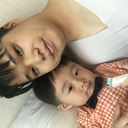

In [43]:
img2

# standardized shape

In [ ]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

images = [
    "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/ff/WashU_Graham_Chapel.JPG",
    "https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg"    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
x = [] 
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)

# Denoise

In [47]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline

In [83]:
def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

Rows: 128, Cols: 128
(128, 128, 3)


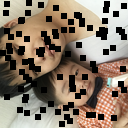

In [49]:
url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"
#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

img_array = np.asarray(photo)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2

In [50]:
"asd"+"11"

'asd11'

In [51]:
os.chdir(os.getcwd()+"\\son_img")

In [54]:
list_imgs=os.listdir()

In [65]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

#url = "http://www.heatonresearch.com/images/about-jeff.jpg"


In [66]:
def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img

In [67]:
x = []    
y = []
loaded_images = []

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


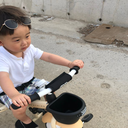

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


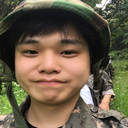

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


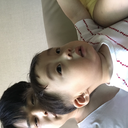

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


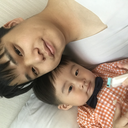

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


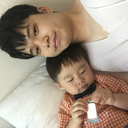

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


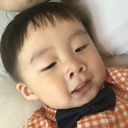

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


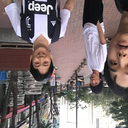

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


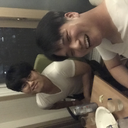

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


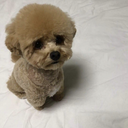

In [68]:
for img in list_imgs:
    img = Image.open(img)
    
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    
    loaded_images.append(img)
    print(url)
    display(img)
    for i in range(10):
        img_array = np.asarray(img)
        img_array_noise = add_noise(img_array)
        
        img_array = img_array.flatten()
        img_array = img_array.astype(np.float32)
        img_array = (img_array-128)/128
        
        img_array_noise = img_array_noise.flatten()
        img_array_noise = img_array_noise.astype(np.float32)
        img_array_noise = (img_array_noise-128)/128
        
        x.append(img_array_noise)
        y.append(img_array)
    
x = np.array(x)
y = np.array(y)

In [69]:
print(x.shape)
print(y.shape)

(90, 49152)
(90, 49152)


In [70]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, HTML 

# Fit regression DNN model.
print("Creating/Training neural network")
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(x.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=1,epochs=20)

print("Neural network trained")

Creating/Training neural network
Train on 90 samples
Epoch 1/20
90/90 [==============================] - 2s 21ms/sample - loss: 0.2772
Epoch 2/20
90/90 [==============================] - 0s 3ms/sample - loss: 0.2474
Epoch 3/20
90/90 [==============================] - 0s 3ms/sample - loss: 0.2316
Epoch 4/20
90/90 [==============================] - 0s 4ms/sample - loss: 0.2153
Epoch 5/20
90/90 [==============================] - 0s 3ms/sample - loss: 0.1949
Epoch 6/20
90/90 [==============================] - 0s 3ms/sample - loss: 0.1711
Epoch 7/20
90/90 [==============================] - 0s 3ms/sample - loss: 0.1442
Epoch 8/20
90/90 [==============================] - 0s 3ms/sample - loss: 0.1151
Epoch 9/20
90/90 [==============================] - 0s 4ms/sample - loss: 0.0931
Epoch 10/20
90/90 [==============================] - 0s 3ms/sample - loss: 0.0771
Epoch 11/20
90/90 [==============================] - 0s 3ms/sample - loss: 0.0602
Epoch 12/20
90/90 [==============================] - 

In [78]:
os.listdir()[0]

'IMG_6504.JPG'

In [80]:
test_img=Image.open(os.listdir()[0])

*** Trial 1
With noise:


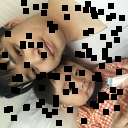

After auto encode noise removal


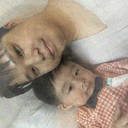

*** Trial 2
With noise:


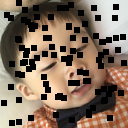

After auto encode noise removal


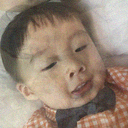

*** Trial 3
With noise:


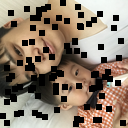

After auto encode noise removal


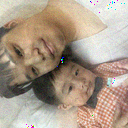

*** Trial 4
With noise:


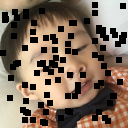

After auto encode noise removal


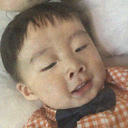

*** Trial 5
With noise:


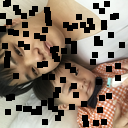

After auto encode noise removal


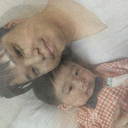

*** Trial 6
With noise:


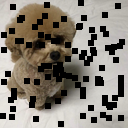

After auto encode noise removal


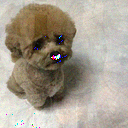

*** Trial 7
With noise:


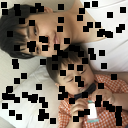

After auto encode noise removal


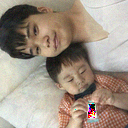

*** Trial 8
With noise:


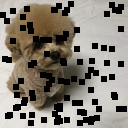

After auto encode noise removal


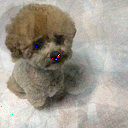

In [88]:
for z in range(8):
    print("*** Trial {}".format(z+1))
    
    # Choose random image
    i = np.random.randint(len(loaded_images))
    img = loaded_images[i]
    
#     img=test_img
#     img = make_square(img)
#     img = img.resize((128,128), Image.ANTIALIAS)

    img_array = np.asarray(img)
    cols, rows = img.size

    # Add noise
    img_array_noise = add_noise(img_array)    

    #Display noisy image
    img2 = img_array_noise.astype(np.uint8)
    img2 = Image.fromarray(img2, 'RGB')
    print("With noise:")
    display(img2)

    # Present noisy image to auto encoder
    img_array_noise = img_array_noise.flatten()
    img_array_noise = img_array_noise.astype(np.float32)
    img_array_noise = (img_array_noise-128)/128
    img_array_noise = np.array([img_array_noise])
    pred = model.predict(img_array_noise)[0]

    # Display neural result
    img_array2 = pred.reshape(128,128,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
#     img2 = img2.reshape(128,128,3)


    print("After auto encode noise removal")
    display(img2)

In [87]:
pred[0]

0.050050974

*** Trial 1
With noise:


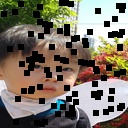

After auto encode noise removal


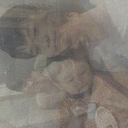

*** Trial 2
With noise:


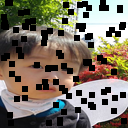

After auto encode noise removal


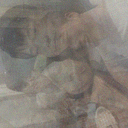

*** Trial 3
With noise:


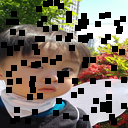

After auto encode noise removal


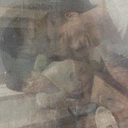

*** Trial 4
With noise:


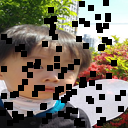

After auto encode noise removal


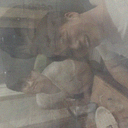

*** Trial 5
With noise:


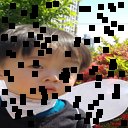

After auto encode noise removal


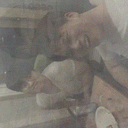

*** Trial 6
With noise:


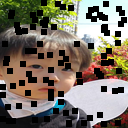

After auto encode noise removal


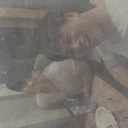

*** Trial 7
With noise:


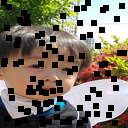

After auto encode noise removal


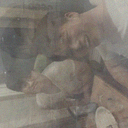

*** Trial 8
With noise:


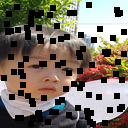

After auto encode noise removal


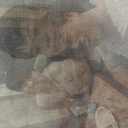

In [84]:
for z in range(8):
    print("*** Trial {}".format(z+1))
    
#     # Choose random image
#     i = np.random.randint(len(loaded_images))
#     img = loaded_images[i]
    
    img=test_img
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)

    img_array = np.asarray(img)
    cols, rows = img.size

    # Add noise
    img_array_noise = add_noise(img_array)    

    #Display noisy image
    img2 = img_array_noise.astype(np.uint8)
    img2 = Image.fromarray(img2, 'RGB')
    print("With noise:")
    display(img2)

    # Present noisy image to auto encoder
    img_array_noise = img_array_noise.flatten()
    img_array_noise = img_array_noise.astype(np.float32)
    img_array_noise = (img_array_noise-128)/128
    img_array_noise = np.array([img_array_noise])
    pred = model.predict(img_array_noise)[0]

    # Display neural result
    img_array2 = pred.reshape(rows,cols,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
    print("After auto encode noise removal")
    display(img2)